#exercise 1
##part1
The DFJ (Dantzig-Fulkerson-Johnson) formulation of the Traveling Salesman Problem (TSP) ensures that it generates exactly feasible tours by incorporating constraints that enforce the key characteristics of a TSP tour:

Every city is visited once and left once: This constraint ensures that each city is included in the tour exactly once, guaranteeing that the tour visits all cities.

The constraint is represented as:

$ \sum_{e \in \delta(i)} x_e = 2, \forall i \in V $

Here, $ \delta(i) $ represents the set of edges incident on vertex $ i $. This constraint ensures that each city is entered and exited exactly once.

Elimination of sub-tours: This constraint prevents the formation of sub-tours, ensuring that the tour is connected and does not visit the same city multiple times without returning to the starting city.

The constraint is represented as:

$ \sum_{e \in \delta(S)} x_e \geq 2, \forall \phi \subset S \subset V $

Here, $ \delta(S) $ represents the set of edges incident on exactly one vertex of the subset $ S $ of $ V $. This constraint ensures that any subset of cities (excluding the entire set) must have at least two edges incident upon it, preventing the formation of sub-tours.

Binary variable constraints: The binary variable constraint ensures that each edge is either included in the tour (assigned a value of 1) or excluded from the tour (assigned a value of 0). This constraint is crucial for defining a feasible tour and ensuring that the optimization problem accurately represents the TSP.

$ x_e \in \{0, 1\}, \forall e \in E $

By incorporating these constraints, the DFJ formulation guarantees that the solution will represent a feasible tour that visits each city exactly once and returns to the original city, satisfying the requirements of the Traveling Salesman Problem. The formulation effectively models the essential characteristics of a TSP tour, ensuring that any solution generated adheres to the problem's constraints. Therefore, the DFJ formulation reliably produces exactly feasible tours for the TSP.


In [1]:
pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 46.0 MB/s eta 0:00:00


In [2]:
!pip install -q pyomo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.2 MB/s eta 0:00:00


In [3]:
from pyomo.environ import *

In [4]:
!apt-get install -y -qq glpk-utils

Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 121752 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_5.0-1_amd64.deb ...
Unpacking libglpk40:amd64 (5.0-1) ...
Selecting previously unselected package glpk-utils.
Preparing to unpack .../glpk-utils_5.0-1_amd64.deb ...
Unpacking glpk-utils (5.0-1) ...
Setting up libsuitesparseconfig5:amd64 (1:5.10.1+dfsg-4b

In [5]:
distances = {
    ("BOMBAY", "KANPUR"): 1289,
    ("BOMBAY", "KHARAGPUR"): 1753,
    ("BOMBAY", "MADRAS"): 1364,
    ("BOMBAY", "DELHI"): 1432,
    ("BOMBAY", "GUWAHATI"): 2586,
    ("BOMBAY", "ROORKEE"): 1594,
    ("KANPUR", "KHARAGPUR"): 1167,
    ("KANPUR", "MADRAS"): 1868,
    ("KANPUR", "DELHI"): 495,
    ("KANPUR", "GUWAHATI"): 1432,
    ("KANPUR", "ROORKEE"): 630,
    ("KHARAGPUR", "MADRAS"): 1562,
    ("KHARAGPUR", "DELHI"): 1567,
    ("KHARAGPUR", "GUWAHATI"): 1057,
    ("KHARAGPUR", "ROORKEE"): 1703,
    ("MADRAS", "DELHI"): 2207,
    ("MADRAS", "GUWAHATI"): 2643,
    ("MADRAS", "ROORKEE"): 2343,
    ("DELHI", "GUWAHATI"): 1891,
    ("DELHI", "ROORKEE"): 212,
    ("GUWAHATI", "ROORKEE"): 2055
}

# Create a new dictionary to store the reversed distances
reversed_distances = {}

# Iterate over the keys in the distances dictionary
for key, value in distances.items():
    # Swap the elements in the key tuple to create the reverse key
    reverse_key = (key[1], key[0])
    # Assign the same distance value to the reverse key
    reversed_distances[reverse_key] = value

# Print the reversed distances dictionary
print(reversed_distances)


{('KANPUR', 'BOMBAY'): 1289, ('KHARAGPUR', 'BOMBAY'): 1753, ('MADRAS', 'BOMBAY'): 1364, ('DELHI', 'BOMBAY'): 1432, ('GUWAHATI', 'BOMBAY'): 2586, ('ROORKEE', 'BOMBAY'): 1594, ('KHARAGPUR', 'KANPUR'): 1167, ('MADRAS', 'KANPUR'): 1868, ('DELHI', 'KANPUR'): 495, ('GUWAHATI', 'KANPUR'): 1432, ('ROORKEE', 'KANPUR'): 630, ('MADRAS', 'KHARAGPUR'): 1562, ('DELHI', 'KHARAGPUR'): 1567, ('GUWAHATI', 'KHARAGPUR'): 1057, ('ROORKEE', 'KHARAGPUR'): 1703, ('DELHI', 'MADRAS'): 2207, ('GUWAHATI', 'MADRAS'): 2643, ('ROORKEE', 'MADRAS'): 2343, ('GUWAHATI', 'DELHI'): 1891, ('ROORKEE', 'DELHI'): 212, ('ROORKEE', 'GUWAHATI'): 2055}


In [6]:
distances.update(reversed_distances)

In [7]:
distances = {
    ("BOMBAY", "KANPUR"): 1289,
    ("BOMBAY", "KHARAGPUR"): 1753,
    ("BOMBAY", "MADRAS"): 1364,
    ("BOMBAY", "DELHI"): 1432,
    ("BOMBAY", "GUWAHATI"): 2586,
    ("BOMBAY", "ROORKEE"): 1594,
    ("KANPUR", "KHARAGPUR"): 1167,
    ("KANPUR", "MADRAS"): 1868,
    ("KANPUR", "DELHI"): 495,
    ("KANPUR", "GUWAHATI"): 1432,
    ("KANPUR", "ROORKEE"): 630,
    ("KHARAGPUR", "MADRAS"): 1562,
    ("KHARAGPUR", "DELHI"): 1567,
    ("KHARAGPUR", "GUWAHATI"): 1057,
    ("KHARAGPUR", "ROORKEE"): 1703,
    ("MADRAS", "DELHI"): 2207,
    ("MADRAS", "GUWAHATI"): 2643,
    ("MADRAS", "ROORKEE"): 2343,
    ("DELHI", "GUWAHATI"): 1891,
    ("DELHI", "ROORKEE"): 212,
    ("GUWAHATI", "ROORKEE"): 2055
}

city_key_mapping = {1: 'BOMBAY', 2: 'KANPUR', 3: 'KHARAGPUR', 4: 'MADRAS', 5: 'DELHI', 6: 'GUWAHATI', 7: 'ROORKEE'}

# Create a new dictionary to store distances with key values instead of city names
new_distances = {}

# Iterate over the keys and values of the distances dictionary
for (city1, city2), distance in distances.items():
    # Get the key values corresponding to the city names
    key1 = next(key for key, value in city_key_mapping.items() if value == city1)
    key2 = next(key for key, value in city_key_mapping.items() if value == city2)
    # Add the distance to the new dictionary with key values
    new_distances[(key1, key2)] = distance

# Print the new distances dictionary
print(new_distances)







{(1, 2): 1289, (1, 3): 1753, (1, 4): 1364, (1, 5): 1432, (1, 6): 2586, (1, 7): 1594, (2, 3): 1167, (2, 4): 1868, (2, 5): 495, (2, 6): 1432, (2, 7): 630, (3, 4): 1562, (3, 5): 1567, (3, 6): 1057, (3, 7): 1703, (4, 5): 2207, (4, 6): 2643, (4, 7): 2343, (5, 6): 1891, (5, 7): 212, (6, 7): 2055}


In [8]:
reversed_distances = {}

# Iterate over the keys in the distances dictionary
for key, value in new_distances.items():
    # Swap the elements in the key tuple to create the reverse key
    reverse_key = (key[1], key[0])
    # Assign the same distance value to the reverse key
    reversed_distances[reverse_key] = value



In [9]:
new_distances.update(reversed_distances)
import itertools


In [22]:
from pulp import *
cities=[i for i in range(1,8)]

# Create a new minimization problem
model = LpProblem("TSP Problem", LpMinimize)

# Define the decision variables
x = LpVariable.dicts("x", new_distances.keys(), cat=LpBinary)

# Define the objective function
model += lpSum(new_distances[(i, j)] * x[(i, j)] for i, j in new_distances.keys())

# Define the constraints
for cit in cities:
    model += lpSum(x[(i, j)] for i, j in new_distances.keys() if i == cit) == 1
    model += lpSum(x[(i, j)] for i, j in new_distances.keys() if j == cit) == 1

# Start and end at Bombay
model += lpSum(x[(1, j)] for j in cities if j != 1) == 1  # Outgoing edges from Bombay
model += lpSum(x[(i, 1)] for i in cities if i != 1) == 1  # Incoming edges to Bombay

# Add constraint: x_ij must equal x_ji


# Solve the problem
model.solve()

# Print the optimal objective value
print("Objective Function Value:", value(model.objective))
# Print the values of the decision variables
vertex=[]
for i,j in new_distances.keys():

    if x[(i, j)].varValue>0:
      vertex.append((i,j))
      print("x[{}, {}] = {}".format(i, j, x[(i, j)].varValue))








Objective Function Value: 6179.0
x[1, 4] = 1.0
x[2, 5] = 1.0
x[3, 6] = 1.0
x[5, 7] = 1.0
x[4, 1] = 1.0
x[7, 2] = 1.0
x[6, 3] = 1.0


In [23]:
vertices=[]
for key,value in city_key_mapping.items():
  vertices.append(value)



In [24]:
edges=[]


In [25]:
egd=[]
egf=[]
for j in vertex:
  a=j[0]
  b=j[1]
  for i in range(1,8):
    if a==i:
      egd.append(vertices[i-1])
    if b==i:
      egf.append(vertices[i-1])


In [26]:
edge=list(zip(egd,egf))

In [27]:
edge

[('BOMBAY', 'MADRAS'),
 ('KANPUR', 'DELHI'),
 ('KHARAGPUR', 'GUWAHATI'),
 ('DELHI', 'ROORKEE'),
 ('MADRAS', 'BOMBAY'),
 ('ROORKEE', 'KANPUR'),
 ('GUWAHATI', 'KHARAGPUR')]

Here we can observe that subtours are framing if we are not including the constraints relationg to subtours , here in above graph 3 subtours are made and now we need to imose the constraints related to subtours

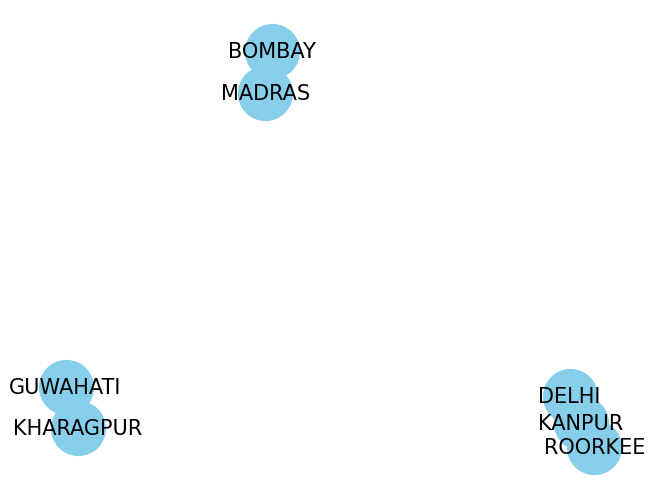

In [42]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the vertices

# Define the edges as tuples (u, v)
edges = edge

# Create a graph
G = nx.Graph()

# Add vertices to the graph
G.add_nodes_from(vertices)

# Add edges to the graph
G.add_edges_from(edges)

# Define node positions
pos = nx.spring_layout(G, seed=42)  # Positions for all nodes, seed for reproducibility

# Draw the graph with better node positioning and labels
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, edge_color='k', linewidths=1, font_size=15)

# Show the graph
plt.show()


Here we can observe that subtours are framing if we are not including the constraints relationg to subtours , here in above graph 3 subtours are made and now we need to impose the constraints related to subtours

In [29]:
#TSP after including the constraints related to subtours
#Considering the set S of Cardinality 2 and gradually increasing to get the optimal solution

import itertools
from pulp import *



# Create a new minimization problem
model1 = LpProblem("TSP Problem", LpMinimize)

# Define the decision variables
x1 = LpVariable.dicts("x1", new_distances.keys(), cat=LpBinary)

# Define the objective function
model1 += lpSum(new_distances[(i, j)] * x1[(i, j)] for i, j in new_distances.keys())

# Define the constraints
for cit in cities:
    model1 += lpSum(x1[(i, j)] for i, j in new_distances.keys() if i == cit) == 1
    model1 += lpSum(x1[(i, j)] for i, j in new_distances.keys() if j == cit) == 1

# Start and end at Bombay
model1 += lpSum(x1[(1, j)] for j in cities if j != 1) == 1  # Outgoing edges from Bombay
model1 += lpSum(x1[(i, 1)] for i in cities if i != 1) == 1  # Incoming edges to Bombay

# Add constraint: x_ij must equal x_ji


# Sub-tour elimination constraints
for r in range(2, 3):  # considering subsets of cardinality 2 to 3
    for subset in itertools.combinations(cities, r):
        edges_out = [(i, j) for i, j in new_distances.keys() if i in subset and j not in subset]
        #edges_in = [(i, j) for i, j in new_distances.keys() if i not in subset and j in subset]
        model1 += lpSum(x1[edge] for edge in edges_out) >= 1
        #model1 += lpSum(x1[edge] for edge in edges_in) >= 1


# Solve the problem
model1.solve()
vertex2=[]
for i,j in new_distances.keys():

    if x1[(i, j)].varValue>0:
      vertex2.append((i,j))
      print("x[{}, {}] = {}".format(i, j, x1[(i, j)].varValue))






x[1, 5] = 1.0
x[2, 6] = 1.0
x[3, 4] = 1.0
x[5, 7] = 1.0
x[4, 1] = 1.0
x[7, 2] = 1.0
x[6, 3] = 1.0


In [36]:
egd1=[]
egf1=[]
for j in vertex2:
  a=j[0]
  b=j[1]
  for i in range(1,8):
    if a==i:
      egd1.append(vertices[i-1])
    if b==i:
      egf1.append(vertices[i-1])

In [37]:
edge2=list(zip(egd1,egf1))

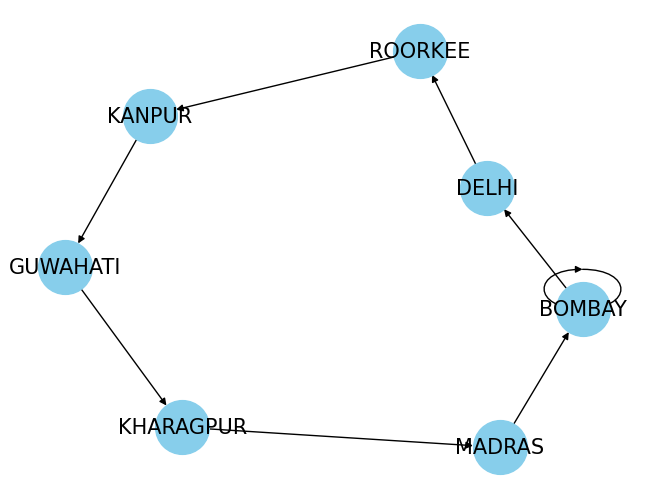

In [41]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the vertices
vert = vertices

# Define the edges as tuples (u, v)
edges3 = edge2

# Create a directed graph
G1 = nx.DiGraph()

# Add vertices to the graph
G1.add_nodes_from(vert)

# Add edges to the graph
G1.add_edges_from(edges3)

# Ensure BOMBAY is the starting and ending node
start_node = "BOMBAY"
G1.add_edge(start_node, start_node)

# Set positions for nodes
pos = nx.spring_layout(G1)

# Draw the directed graph
nx.draw(G1, pos, with_labels=True, node_color='skyblue', node_size=1500, edge_color='k', linewidths=1, font_size=15, arrows=True)

# Show the graph
plt.show()


Here we can observe that after adding the subtour elimination constraint it is giving us an optimal solution
The Shortest such path covering all iits is 1->5->7->2->6->3->4->1

In [31]:
path=[1,5,7,2,6,3,4,1]
path_with_cities=[]
for j in path:
  path_with_cities.append(vertices[j-1])

In [35]:
pt="->".join(path_with_cities)
print(f"The shortest such path covering all cities is {pt} and\nshortest distance of tour is {value(model1.objective)} kms")

The shortest such path covering all cities is BOMBAY->DELHI->ROORKEE->KANPUR->GUWAHATI->KHARAGPUR->MADRAS->BOMBAY and
shortest distance of tour is 7689.0 kms


**Part3**

To determine the number of extreme points of the TSP polytope for the given IIT problem with 7 IITs (including the starting point), we need to consider the number of permutations of the remaining 6 cities.

Given that we have 6 cities (IITs) to permute, the number of extreme points can be calculated as follows:

Number of Extreme Points = (n - 1)!
Where:
- n is the total number of cities (including the starting city), which is 7 in this case.
- (n - 1)! represents the number of permutations of the remaining cities.

Substituting n = 7 into the formula:

Number of Extreme Points = (7 - 1)!
                           = 6!

= 6 × 5 × 4 × 3 × 2 × 1
= 720

Therefore, the TSP polytope of the IIT problem with 7 IITs (including the starting point) will have 720 extreme points.


**Part4**

In [23]:
def is_extreme_point(vector, distances):
    """
    Checks if a given 0-1 vector is an extreme point of the TSP feasible region.

    Parameters:
        vector (list): A 0-1 vector representing the presence or absence of edges.
        distances (dict): A dictionary containing distances between cities.

    Returns:
        str: "extreme point" if the vector is an extreme point, "not an extreme point" otherwise.
    """
    num_cities = len(vector)

    # Check if the vector is feasible (satisfies constraints)
    if sum(vector) != num_cities - 1:
        return "not an extreme point"  # Does not satisfy constraint: Every city is visited once and left once

    # Check if removing any edge makes the solution infeasible
    for i in range(num_cities):
        for j in range(i+1, num_cities):
            if vector[i] == 1 and vector[j] == 1:
                # Removing edge (i, j) and checking if the resulting vector is feasible
                modified_vector = vector[:]
                modified_vector[num_cities * i + j] = 0
                if sum(modified_vector) != num_cities - 2:
                    return "extreme point"  # Removing edge (i, j) makes the solution infeasible

    return "not an extreme point"